
🔎 Modelo: RandomForest
              precision    recall  f1-score   support

   combinado       0.38      0.35      0.36        34
 hiperactivo       0.22      0.18      0.20        33
    inatento       0.32      0.39      0.35        33

    accuracy                           0.31       100
   macro avg       0.30      0.31      0.30       100
weighted avg       0.31      0.31      0.31       100



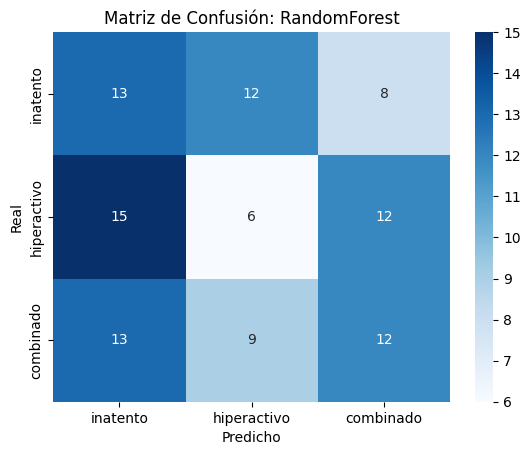


🔎 Modelo: MLPClassifier
              precision    recall  f1-score   support

   combinado       0.50      0.50      0.50        34
 hiperactivo       0.36      0.24      0.29        33
    inatento       0.32      0.42      0.36        33

    accuracy                           0.39       100
   macro avg       0.39      0.39      0.38       100
weighted avg       0.40      0.39      0.39       100



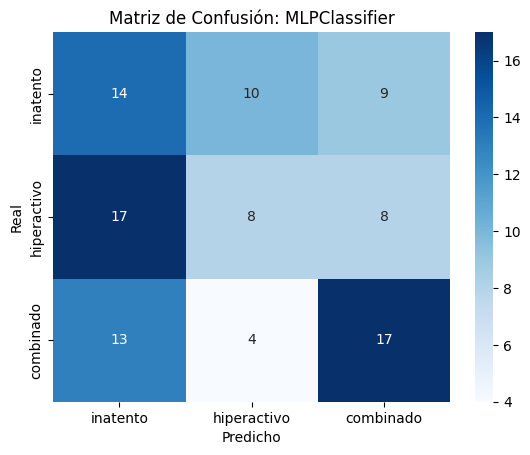

✅ Modelo RandomForest guardado en: models/modelo_perfil.pkl
✅ Escalador guardado en: models/escalador.pkl


In [52]:
# 📌 notebook/02_modelado.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 1️⃣ Cargar dataset clínicamente etiquetado
df = pd.read_csv("../data/snap_dataset_labeled.csv")

# 2️⃣ Variables predictoras (respuestas) y objetivo (perfil)
X = df[[str(i) for i in range(1, 27)]]
y = df["profile"]

# 3️⃣ Escalamiento (solo para redes neuronales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5️⃣ Definimos los modelos
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42
    ),
    "MLPClassifier": MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        max_iter=1000,
        random_state=42
    )
}

# 6️⃣ Evaluación de modelos con validación cruzada
for name, model in models.items():
    print(f"\n🔎 Modelo: {name}")
    X_input = X if name == "RandomForest" else X_scaled
    y_pred = cross_val_predict(model, X_input, y, cv=cv)

    print(classification_report(y, y_pred, digits=2))
    
    # 📊 Matriz de confusión
    cm = confusion_matrix(y, y_pred, labels=["inatento", "hiperactivo", "combinado"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["inatento", "hiperactivo", "combinado"],
                yticklabels=["inatento", "hiperactivo", "combinado"])
    plt.title(f"Matriz de Confusión: {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# 7️⃣ Entrenar modelo final (el que tenga mejor resultado)
final_model = models["RandomForest"]
final_model.fit(X, y)

# 8️⃣ Guardar modelo entrenado
joblib.dump(final_model, "../models/modelo_perfil.pkl")
print("✅ Modelo RandomForest guardado en: models/modelo_perfil.pkl")

# 9️⃣ Guardar scaler para uso posterior con MLP
joblib.dump(scaler, "../models/escalador.pkl")
print("✅ Escalador guardado en: models/escalador.pkl")